### Peerloankart is an NBFC which facilitates peer-to-peer loans. 
- It connects people who need to borrow(borrowers) with people who have money(investors).
- As an investor,you would want to invest in people who showed a profile of having a high probability of paying you back.
- Create a model which will help you predict whether a borrower will repay back the loan.

* FICO:fico(credit score) score
* credit.policy: if the customer meets the criteria for credit underwriting as specified by FICO(Credit rating org)
* purpose: The purpose of taking a loan
* not.fully.paid: The DV,1 implies the borrower has not repaid back the previous loan,0-paid back the previous loan.

In [90]:
####loading he libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
loans=pd.read_csv('loanborowwerdata.csv')
loans.head(2)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0


In [94]:
#### we filter out only the variables which can help us predict if the respondent might be siutable for extending a loan to.
dataset=loans.filter(['credit.policy','purpose','fico','not.fully.paid'])
dataset.head()

,credit.policy,purpose,fico,not.fully.paid
0,1,debt_consolidation,737,0
1,1,credit_card,707,0
2,1,debt_consolidation,682,0
3,1,debt_consolidation,712,0
4,1,credit_card,667,0


In [6]:
dataset.shape

(9578, 4)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   credit.policy   9578 non-null   int64 
 1   purpose         9578 non-null   object
 2   fico            9578 non-null   int64 
 3   not.fully.paid  9578 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 299.4+ KB


In [8]:
dataset['not.fully.paid'].value_counts()

not.fully.paid
0    8045
1    1533
Name: count, dtype: int64

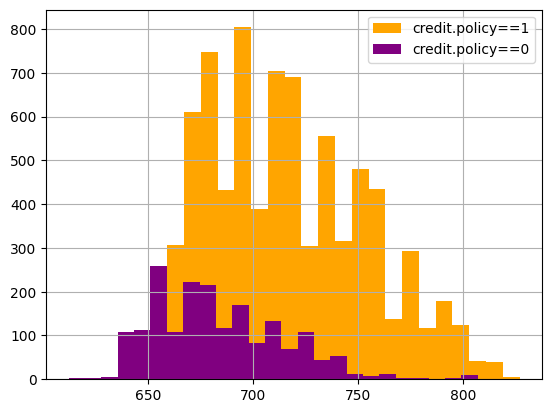

In [9]:
##### checking the relationship bw the credit policy and fico scores:
dataset[dataset['credit.policy']==1]['fico'].hist(color='orange',bins=25,label='credit.policy==1')
dataset[dataset['credit.policy']==0]['fico'].hist(color='purple',bins=25,label='credit.policy==0')
plt.legend()
plt.show()
#people who have agreed for credit underwriting,enjo better credit scores                                            

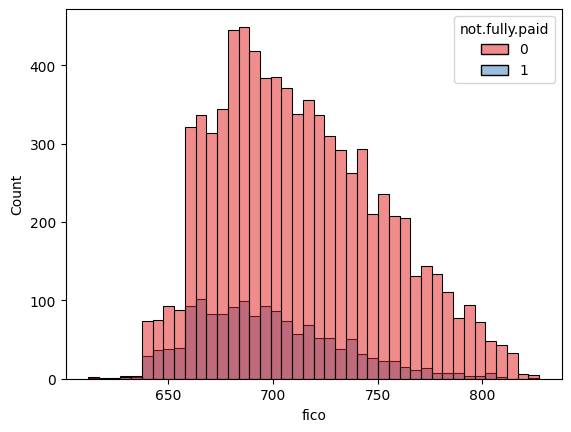

In [10]:
#### univariate analysis of fico:
sns.histplot(data=dataset,x='fico',hue='not.fully.paid',palette='Set1')
plt.show()
###people who has repaid back their previous loans within the time with interest will enjoy higher credit scores.           

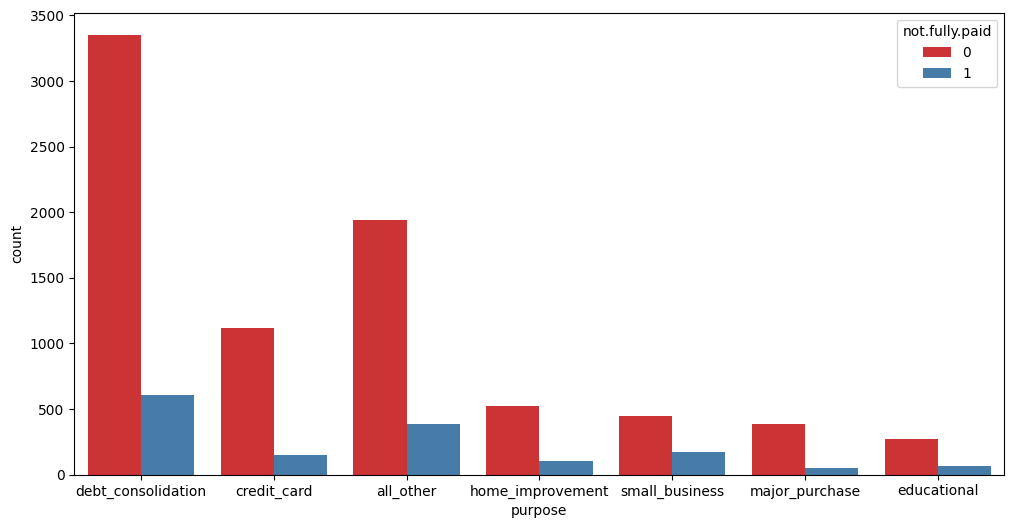

In [11]:
plt.figure(figsize=(12,6))
sns.countplot(x='purpose',hue='not.fully.paid',data=dataset,palette='Set1')
plt.show()

In [12]:
dataset.purpose.value_counts()

purpose
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: count, dtype: int64

In [13]:
######small_business is the riskiest category

In [14]:
categorical_variable=['purpose']

In [15]:
dataset=pd.get_dummies(dataset,columns=categorical_variable,drop_first=True,dtype=int)
dataset

,credit.policy,fico,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,737,0,0,1,0,0,0,0
1,1,707,0,1,0,0,0,0,0
2,1,682,0,0,1,0,0,0,0
3,1,712,0,0,1,0,0,0,0
4,1,667,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
9573,0,672,1,0,0,0,0,0,0
9574,0,722,1,0,0,0,0,0,0
9575,0,687,1,0,1,0,0,0,0
9576,0,692,1,0,0,0,1,0,0


In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   credit.policy               9578 non-null   int64
 1   fico                        9578 non-null   int64
 2   not.fully.paid              9578 non-null   int64
 3   purpose_credit_card         9578 non-null   int32
 4   purpose_debt_consolidation  9578 non-null   int32
 5   purpose_educational         9578 non-null   int32
 6   purpose_home_improvement    9578 non-null   int32
 7   purpose_major_purchase      9578 non-null   int32
 8   purpose_small_business      9578 non-null   int32
dtypes: int32(6), int64(3)
memory usage: 449.1 KB


In [17]:
X=dataset.drop('not.fully.paid',axis=1)
y=dataset['not.fully.paid']

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.70,random_state=0)

In [19]:
from sklearn.tree import DecisionTreeClassifier
tree_model=DecisionTreeClassifier()
tree_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [20]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=50)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50)

In [21]:
pred_tree=tree_model.predict(X_test)
pred_rfc=rfc.predict(X_test)

In [22]:
from sklearn.metrics import classification_report,confusion_matrix
cm1_tree=confusion_matrix(y_test,pred_tree)
cm2_forest=confusion_matrix(y_test,pred_rfc)

In [23]:
print(cm1_tree)
print('---------')
print(cm2_forest)

[[2383   23]
 [ 458   10]]
---------
[[2377   29]
 [ 453   15]]


In [24]:
print(classification_report(y_test,pred_tree))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2406
           1       0.30      0.02      0.04       468

    accuracy                           0.83      2874
   macro avg       0.57      0.51      0.47      2874
weighted avg       0.75      0.83      0.77      2874



In [25]:
##### Decision Trees give an accuracy of 83%

In [26]:
print(classification_report(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2406
           1       0.34      0.03      0.06       468

    accuracy                           0.83      2874
   macro avg       0.59      0.51      0.48      2874
weighted avg       0.76      0.83      0.77      2874



In [27]:
##### Random forest gives an accuracy of 83%

In [28]:
rfc.feature_importances_  #feature_importances_-parameter

array([0.16391383, 0.70035004, 0.03122815, 0.01763714, 0.01516089,
       0.01647521, 0.01463666, 0.04059806])

In [29]:
X.columns

Index(['credit.policy', 'fico', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_major_purchase',
       'purpose_small_business'],
      dtype='object')

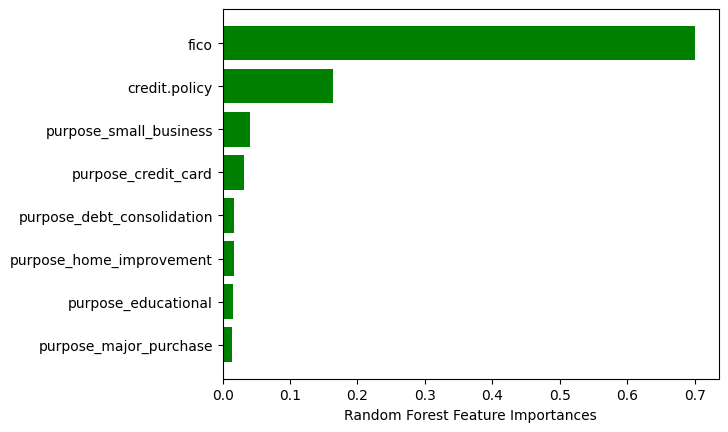

In [30]:
sorted_index=rfc.feature_importances_.argsort()
plt.barh(X.columns[sorted_index],rfc.feature_importances_[sorted_index],color='g',align='center')
plt.xlabel('Random Forest Feature Importances')
plt.show()

#### 'Fico' is the most important variable and should ideally be used at the root node for splitting,to result in fewer splits and easy convergence as the Information Gain is highest for Fico.

In [32]:
###hyperparameter tuning:

### The best way to think about hyperparameters is like the settings of an algorithm that can be adjusted to optimize performance,Scikit-Learn implements a set of sensible default hyperparameters for all models, but these are not guaranteed to be optimal for a problem.Hyperparameter tuning relies more on experimental results than theory, and thus the best method to determine the optimal settings is to try many different combinations evaluate the performance of each model.

### Using Scikit-Learn’s RandomizedSearchCV method, we can define a grid of hyperparameter ranges, and randomly sample from the grid, performing K-Fold CV with each combination of values.
### we can also explicitly specify every combination of settings to try. We do this with GridSearchCV, a method that, instead of sampling randomly from a distribution, evaluates all combinations we define.

In [35]:
print('Hyperparameters in use:\n')
print(rfc.get_params())

Hyperparameters in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


##### Tuning the model:
* n_estimators: Number of trees in the Forest
* criteria: gini,entropy-the randomness in the data,or the impurity at each node
* Max_samples: The subset of data given to each tree in the forest
* Max_features: The maximum number of features used at each node for splitting
* Max_depth: How many decision splits we want at each node.

In [37]:
##### the guesses for each hyperparameter here:
n_estimators=[50,100,200,175]
criterion=['gini','entropy']
max_samples=[0.5,1,2,3]
max_features=[0.3,0.6,1]
max_depth=[3,5,7,4]


In [38]:
param_grid={'n_estimators':n_estimators,
            'criterion':criterion,
            'max_samples':max_samples,
            'max_features':max_features,
            'max_depth':max_depth}

print(param_grid)
            
            
            
            

{'n_estimators': [50, 100, 200, 175], 'criterion': ['gini', 'entropy'], 'max_samples': [0.5, 1, 2, 3], 'max_features': [0.3, 0.6, 1], 'max_depth': [3, 5, 7, 4]}


In [39]:
from sklearn.model_selection import GridSearchCV
rf_grid=GridSearchCV(estimator=rfc,param_grid=param_grid,cv=5,n_jobs=-1)

In [40]:
import warnings
warnings.filterwarnings('ignore')
rf_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=50), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 4],
                         'max_features': [0.3, 0.6, 1],
                         'max_samples': [0.5, 1, 2, 3],
                         'n_estimators': [50, 100, 200, 175]})

In [41]:
rf_grid.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 0.3,
 'max_samples': 0.5,
 'n_estimators': 100}

In [42]:
rf_grid.best_score_

0.8412887464244772

In [43]:
from sklearn.model_selection import RandomizedSearchCV
rfc.grid1=RandomizedSearchCV(estimator=rfc,param_distributions=param_grid,cv=10,n_jobs=-1)

In [44]:
rfc.grid1.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(n_estimators=50),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 7, 4],
                                        'max_features': [0.3, 0.6, 1],
                                        'max_samples': [0.5, 1, 2, 3],
                                        'n_estimators': [50, 100, 200, 175]})

In [45]:
rfc.grid1.best_params_

{'n_estimators': 50,
 'max_samples': 1,
 'max_features': 0.3,
 'max_depth': 4,
 'criterion': 'entropy'}

In [46]:
rfc.grid1.best_score_

0.8411399782013923

In [47]:
### We can increase the accuracy of the randomforest classifier by 1.1% by hyperparameter tuning.